In [1]:
import numpy as np # linear algebra
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import util
from timeit import default_timer as timer
# set a results file
logger = util.result(path="", file="results.logs")
logger.propagate = False

from sklearn.preprocessing import StandardScaler

<h3 style="color: #dddda1">Pull configs and set defaults</h3>

In [2]:
files = util.get_config_values("files")
validation_types = util.get_config_values("validation_types")
split_types = util.get_config_values("split_types")

split_size = util.get_config_values("split_size")
preprocessors = util.get_config_values("preprocessors")
models = util.get_config_values("models")
evaluators = util.get_config_values("evaluators")
alpha_range = np.linspace(0.01,500,1000, endpoint=False)
folds = util.get_config_values("general", list_type=False, key="folds")
wl = np.arange(1100, 2252, 2) # Set wavelength range
pipeline_run_types = util.get_config_values("pipeline_run_types")

# Using the beer dataset
dataset = files[1]

# Nothing to change here.
split_params = {
    'sep' : ',',
    'drop_columns' : ['y'],
    'index_column' : None,
    'y_data_column' : 'y',
}

<h3 style="color: #00faaa">Running LASSO pipeline with SavGol+Derivative and following parameters</h3>
<h5 style="color: white">Train/Test split - Modifiable</h5>
<h5 style="color: white">Validation method - FIXED to KFolds CV, folds=5</h5>

INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : data/beer_dataset.csv , Preprocessor : snv, Model : lasso, Evaluator : mse
INFO Validation type : repeated-kfold-cv, folds (for CV) : 5
INFO [VALIDATION AND HYPERPARAMETER (Alpha value) TUNING]


[Model Evaluation] MSE value between y_test and y_pred : 4.898
[Model Evaluation] MSE value between y_test and y_pred after pre-processing : 4.898


INFO Optimized alpha value for Lasso 0.00026797162432742677
INFO [MODEL EVALUATION]


Accuracy = 99.58%.


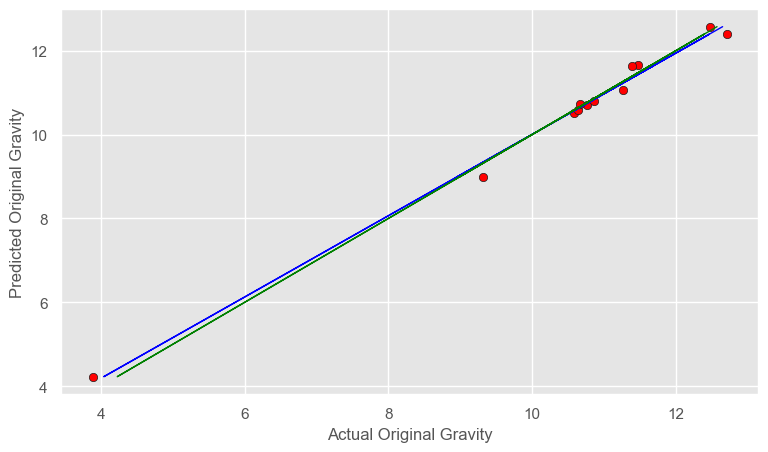

INFO Model loss : 0.04062216018744214
INFO Elapsed time for pipeline run : 7.28
INFO Pipeline end...
INFO ************************************


In [4]:
# Data splitting can be done in various proportions. Check proportions of train-test values available in configfile.ini file
data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=dataset, split_params=split_params, test_size=float(split_size[0]), showDataEDA=False)


# Not required since we use only SNV and MSC for LASSO
preprocessor_params = {}

# Set plotting:True for showing all plots (preprocessing, model fitting, etc. everything)
# Set showModelEvaluationPlots:True specifically to show final model evaluation and line of best fit plots. IDEALLY MUST BE SET TO True
# Set models[0] for PLS and models[1] for LASSO
# evaluators[0] means MSE. Nothing to change here because MSE is best for regression model evaluation
# preprocessor: preprocessor[index] where index is (0,...,10). Here since it's running in loop, it gets from val.
# preprocessor-params: only required for SavGol and its related combos.
# pipeline_run_type: pipeline_run_types[index] -> index can be 0 or 1. 0 means only until preprocessing, 1 means total.
pipeline_params = {
    'logger' : logger,
    'data' : data,
    'validation-type' : validation_types[2],
    'preprocessor' : preprocessors[3],              # set 3 for SNV and 4 for MSC
    'preprocessor-params' : preprocessor_params,
    'model' : models[1],
    'evaluator' : evaluators[0],
    'alpha_range' : alpha_range,
    'folds' : int(folds),
    'wl' : wl,
    'plotting' : False,
    'showModelEvaluationPlots' : True,
    'pipeline_run_type' : pipeline_run_types[1]
}

start = timer()
logger.info("************************************")
logger.info("Pipeline Start...")
logger.info("Pipeline params :")
logger.info("Data : " + str(dataset) + " , Preprocessor : " + str(pipeline_params['preprocessor'])
            + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", folds (for CV) : " + str(pipeline_params['folds']))
util.pipeline(pipeline_params)
end = timer()
logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
logger.info("Pipeline end...")
logger.info("************************************")